# Защита персональных данных клиентов

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первый-взгляд" data-toc-modified-id="Первый-взгляд-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первый взгляд</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Первый взгляд

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.core.display import display, HTML

In [2]:
warnings.filterwarnings('ignore')
df = pd.read_csv('/datasets/insurance.csv')
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
878,1,32.0,17800.0,2,0
1107,1,19.0,31500.0,1,0
1695,0,27.0,47400.0,1,0
4441,0,24.0,29000.0,1,0
2700,1,26.0,46800.0,2,0
3189,1,28.0,54000.0,1,0
3690,0,24.0,60500.0,0,0
1254,1,23.0,32500.0,1,0
3013,0,19.0,53500.0,2,0
1380,1,34.0,46000.0,0,0


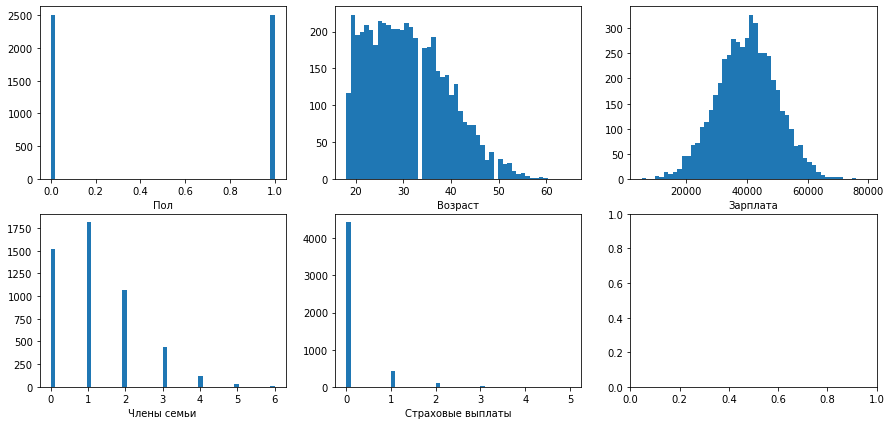

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(15,7))

for i in range(len(df.columns)):
    axes[i // 3][i % 3].hist(df[list(df.columns)[i]], bins = 50)
    axes[i // 3][i % 3].set_xlabel(list(df.columns)[i])

### Вывод 

Исходные данные представляют собой таблицу из 5 стобцов и 5000 строк. Пропусков в них нет, на гистограммах явных аномалий не замечено, разве что выглядит необычным равное количесвто мужчин и женщин в выборке. Типы данных тоже указаны корректно, однако столбцы стоит переименовать.

## Предобработка 

In [4]:
df.columns = ['sex', 'age', 'salary', 'family_size', 'payments']

In [5]:
df.duplicated().sum()

153

In [6]:
df = df.drop_duplicates().reset_index(drop=True)

### Вывод 

Названия столбцов были заменены на корректные. Также были обнаружены 153 дубликата в таблице, которые были незамедлительно удалены.

## Умножение матриц

Наша задача - сравнить предсказания модели, обученной на исходных данных, с предсказаниями модели, для обучения которой данные были домножены на случайную обратимую матрицу. Так как исходные данные различны, формулы обучения тоже будут отличаться:

$$ w_1 = (X^T X)^{-1} X^T y \\w_2 = ((XP)^T (XP))^{-1} (XP)^T y \;, где: $$

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу);

- $X$ — матрица признаков (нулевой столбец состоит из единиц);

- $y$ — вектор целевого признака;

- $P$ — матрица, на которую умножаются признаки;


В таком случае, формулы для обоих предсказаний будут выглядеть следующим образом:

$$ a_1=Xw_1 \\a_2 = (XP)w_2 $$

Тогда:

$$
a_2 = XP((XP)^T XP)^{-1}(XP)^T y \\\;\\
a_2 = XP(X^T X)^{-1}(P^T P)^{-1}X^T P^T y \\\;\\
a_2 = X(X^T X)^{-1}X^T y PP^{-1}P^T(P^T)^{-1}\\\;\\
a_2 = X(X^T X)^{-1}X^T yE\\\;\\
a_2 = a_1\\
$$

Как можно заметить, равенство справедливо, значит предсказания обеих моделей идентичны, не смотря на то, что признаки одной из них были домножены на случайную обратимую матрицу.

### Вывод

Путём нехитрых математических вычислений мы выяснили, что домножение матрицы признаков на любую случайную обратимую матрицу не должно исказить точность работы модели. Это означает, что мы вполне можем использовать такой способ шифрования данных пользователей.

## Алгоритм преобразования

Упакуем функционал шифрования в отдельую функцию `encryption`. На вход она примет датафрейм с признаками для обучения, сгенерирует случайную обратимую матрицу, умножит её на матрицу признаков и вернёт нам результат. Вероятность создать случайно необратимую матрицу мала, но такое возможно. Если это произойдёт, функция повторит попытку ещё раз, а затем и снова, если на этот раз опять не получится. Всего будет 10 попыток найти случайную обратимую матрицу, и, если этого количества не хватит, то мы увидим сообщение об ошибке.

In [7]:
def encryption (features):
    X = features.values
    for i in range(10):
        try:
            P = np.random.random((X.shape[1], X.shape[1]))
            np.linalg.inv(P)
            return X @ P
        except:
            continue
    else:
        print('Не удалось найти случайную обратимую матрицу.')  

### Вывод 

Мы использовали результаты наших вычислений, чтобы создать несложный алгоритм шифрования данных клиентов, для чего создали отдельную функцию. Теперь можно проверить её на практике, обучив две модели на двух разных наборах данных.

## Проверка алгоритма

Разделим данные на три группы: признаки для обучения, признаки для обучения прошедшие наше шифрование, и целевой признак.

In [8]:
X = df.drop('payments', axis=1)
X_crypt = encryption(X)
y = df['payments']

Поскольку мы хотим обучить две модели, нам потребуется два комплекта X_train и X_test - для оригинальных данных и для зашифрованных. Поскольку мы не изменяли значения целевого признака, его можно разделить только один раз. Размер тестовой выборки нас сейчас не особо интересует, поскольку наша цель - проверить работу алгоритма, а не добиться высокого качества предсказания.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [10]:
X_train_crypt, X_test_crypt= train_test_split(X_crypt, random_state=123)

Теперь обучим две модели линейной регресии, каждую на своём наборе данных. Для каждой измерим значение метрики R2, после чего выведем их на экран, для сравнения.

In [11]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
predictions_1 = model_1.predict(X_test)
score_1 = r2_score(y_test, predictions_1)

model_2 = LinearRegression()
model_2.fit(X_train_crypt, y_train)
predictions_2 = model_2.predict(X_test_crypt)
score_2 = r2_score(y_test, predictions_2)

display(HTML("<font size=3><p><br><b>Значение метрики R2</b></p>"))
print('- для модели, обученной на исходных данных: {: >13.5f}'.format(score_1), 
      '\n- для модели, обученной на зашифрованных данных: {: >8.5f}'.format(score_2))

- для модели, обученной на исходных данных:       0.40979 
- для модели, обученной на зашифрованных данных:  0.40979


### Вывод 

Как и ожидалось, качество модели не изменилось, не смотря на то, что исходные данные были домножены на случайную матрицу. 

## Общий вывод

Мы выяснили, что для шифрования данных, которые в дальнейшем будут использоваться, можно применять метод домножения этих данных на случайную обратимую матрицу. Такое изменение никак не повлияет на качество работы модели, и, в то же время, изменит исходные данные до неузнаваемости. С другой стороны, если речь идёт о действительно конфиденциальной информации, то такая мера защиты выглядит несколько примитивной, ведь мы использовали всего один ключ. Ведь сколько бы раз мы не повтряли операцию домножения на случайную матрицу, в результате мы всё равно получим такое же предсказание, что и на исходных данных. В то же время, многократное умножение может усложнить процесс получения конфиденциальных данных. 